# Drawing From A Given Distribution
**FIZ353 - Numerical Analysis | 04/12/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

## Discrete Distributions
A fair, 6-sided dice has equal probabilities for each of the outcomes between 1-6 and this can be represented in a graph such as:

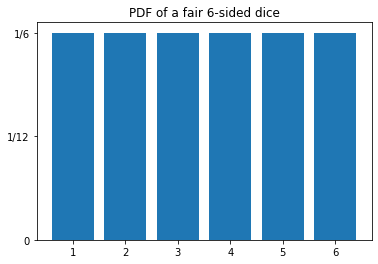

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fair_pdf = np.ones(6) * 1./6

plt.bar(np.arange(1,7),fair_pdf)
plt.yticks([0,1/12,1/6],["0","1/12","1/6"])
plt.title("PDF of a fair 6-sided dice")
plt.show()

These kind of probability distribution functions (PDFs) where every possible outcome has equal probability are called as **Uniform Distributions**.

Now consider that we have a "loaded dice" such that its PDF is given by:

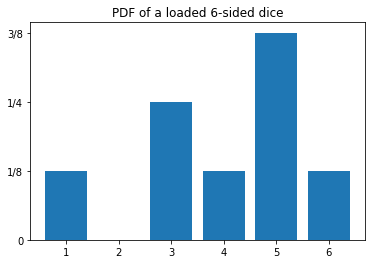

In [2]:
loaded_pdf = np.array([1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(np.arange(1,7),loaded_pdf)
plt.yticks([0,1/8,1/4,3/8],["0","1/8","1/4","3/8"])
plt.title("PDF of a loaded 6-sided dice")
plt.show()

and we are using it to draw our data.

We will assume that we only have a randomizer function that uses uniform distribution. 

### numpy.random.rand()
numpy's random.rand() is such a function that generates a random number uniformly (where each number has an equal probability) between 0 and 1 [0,1), i.e., 0 inclusive, 1 exclusive. 

In [3]:
import numpy as np

# Fixing the seed so that the results are repeatable
np.random.seed(353)

In [4]:
# Returns a single random number between 0 and 1 [0,1)
r = np.random.rand() 
print("r:",r,"\n")

r: 0.4361800250899014 



In [5]:
# Returns a (2x3) matrix filled with random numbers [0,1)
m = np.random.rand(2,3)
print("m:\n",m,"\n")

m:
 [[0.26300446 0.81565745 0.6808622 ]
 [0.74138771 0.30520115 0.08876155]] 



In [6]:
# To pick a number between a and b, 
#all we need to do is multiply the rand by (b-a) and add a, e.g.,
random_number_between_7_and_11 = np.random.rand() * (11-7) + 7
print("r_(7-11): ",random_number_between_7_and_11,"\n")

r_(7-11):  10.00272480217471 



In [7]:
# To pick a random integer from [a,b):
random_integer_between_7_and_11 = np.floor(np.random.rand() * (11-7) + 7)
print("int_(7-11): ",random_integer_between_7_and_11,"\n")

int_(7-11):  7.0 



In [8]:
# ... or we can use the built-in numpy.random.randint(min,max,size):
print(np.random.randint(7,11,[2, 3]))

[[9 9 7]
 [7 9 9]]


### Drawing directly from a list
In our first approach we will put the possible outcomes of our loaded dice into a box, such that the occurence of each of the possible outcomes will reflect the given PDF, e.g., out of a total 8 entries, 1 of them will be 1, no 2, 2 of them will be 3, etc..

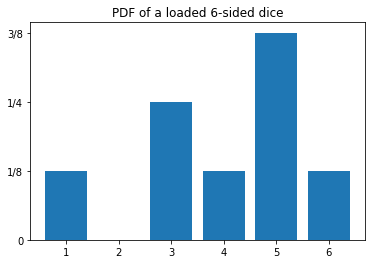

In [9]:
loaded_pdf = np.array([1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(np.arange(1,7),loaded_pdf)
plt.yticks([0,1/8,1/4,3/8],["0","1/8","1/4","3/8"])
plt.title("PDF of a loaded 6-sided dice")
plt.show()

In [10]:
box_contents = np.array([1,3,3,4,5,5,5,6])

So we will pick one from the box, record it and will then put it back. Let's do this operation 10 times:

In [11]:
drawn_numbers = np.array([])
for i in range(1,11):
    # We have 8 elements in our box, so randomly pick one
    r = np.random.randint(0,8) # r is an integer from [0,7]
    rth_element = box_contents[r]
    drawn_numbers = np.append(drawn_numbers,rth_element)
print(drawn_numbers)

[5. 5. 1. 3. 4. 6. 3. 3. 3. 1.]


In [12]:
drawn_numbers

array([5., 5., 1., 3., 4., 6., 3., 3., 3., 1.])

In [13]:
f = drawn_numbers==5
sum(f)

2

In [14]:
# Let's calculate the frequencies of occurences:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))


Number of occurences of 1: 2
Number of occurences of 2: 0
Number of occurences of 3: 4
Number of occurences of 4: 1
Number of occurences of 5: 2
Number of occurences of 6: 1


[0.2 0.  0.4 0.1 0.2 0.1]


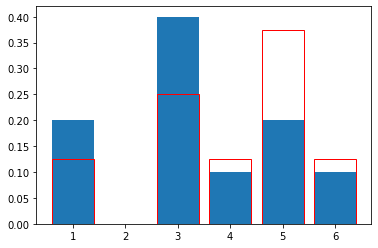

In [15]:
# From here on, calculating the occurence probabilities are straightforward:
probs = freqs / 10.
probs = probs[1:7] # Taking out the dummy 0th entry
print(probs)

# We will use the original probability dist for comparison
probs_real = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

plt.bar(range(1,7),probs)
plt.bar(range(1,7),probs_real[1:7],color="none",edgecolor="red")
plt.show()

Not quite what we started from in the first place.

Let's collect all the code we have written so far and also increase the number of drawings from the box:

Number of occurences of 1: 1245
Number of occurences of 2: 0
Number of occurences of 3: 2498
Number of occurences of 4: 1222
Number of occurences of 5: 3796
Number of occurences of 6: 1239

probabilities: 
 [0.1245 0.     0.2498 0.1222 0.3796 0.1239]


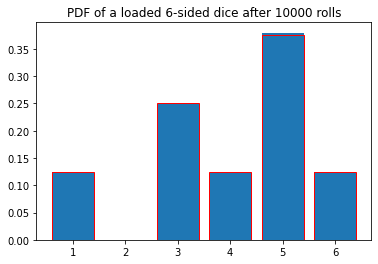

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# We will use the original probability dist for comparison
probs_real = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

N = 10000; # Number of drawings
box_contents = np.array([1,3,3,4,5,5,5,6])

drawn_numbers = np.array([])
for i in range(0,N):
    # We have 8 elements in our box, so randomly pick one
    r = np.random.randint(0,8) # r is an integer from [0,7]
    rth_element = box_contents[r]
    drawn_numbers = np.append(drawn_numbers,rth_element)
    
# Let's calculate the frequencies of occurences:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))
    
probs = freqs / N
probs = probs[1:7] # Taking out the dummy 0th entry
print("\nprobabilities: \n",probs)
plt.bar(range(1,7),probs)
plt.bar(range(1,7),probs_real[1:7],color="none",edgecolor="red")
plt.title("PDF of a loaded 6-sided dice after %d rolls"%(N))
plt.show()

And thus, we recover our initial distribution.

### Using the PDF directly
Most of the time, we don't have a small number of options (in the limit, we will be talking about continous outcomes), or even rational probabilities meaning that, we are not able to construct a sample box representing the distribution precisely. In those times, we literally employ the probabilities:
1. First, pick a random possible outcome
2. Then, roll a fair dice to see if it would come

Codewise, this translates to:

Number of occurences of 1: 1196
Number of occurences of 2: 0
Number of occurences of 3: 2519
Number of occurences of 4: 1237
Number of occurences of 5: 3790
Number of occurences of 6: 1259

Calculated probabilities: 
 [0.1196 0.     0.2519 0.1237 0.379  0.1259]


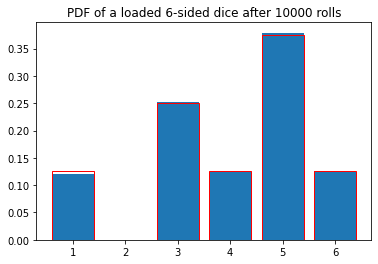

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# The first 0 is to cover the dummy 0th value
probs = np.array([0, 1/8, 0, 2/8, 1/8, 3/8, 1/8])

N = 10000

drawn_numbers = np.array([])

while drawn_numbers.size<=N:
    # First pick a random integer from [1,6]
    r = np.random.randint(1,7)
    
    # It's happening probability is probs[r],
    # so, roll a dice, if the outcome is less than the
    # probability, accept it, else, reject it
    if(np.random.rand()<probs[r]):
        drawn_numbers = np.append(drawn_numbers,r)

# Calculate the frequencies of occurence & probabilities from the set:
freqs = np.zeros(7)
for i in range(1,7):
    freqs[i] = np.sum(drawn_numbers == i)
    print ("Number of occurences of %d: %d"%(i,freqs[i]))
    
probs2 = freqs / N
probs2 = probs2[1:7] # Taking out the dummy 0th entry
print("\nCalculated probabilities: \n",probs2)
plt.bar(range(1,7),probs2)
plt.bar(range(1,7),probs[1:7],color="none",edgecolor="red")
plt.title("PDF of a loaded 6-sided dice after %d rolls"%(N))
plt.show()

## An Introduction to Continous Distributions & Gaussian Distribution
A continous distribution is characterized by a normalized PDF p(x) such that:
\begin{equation*}
\int_{-\infty}^{\infty}{p(x)\,\mathrm{d}x } = 1
\end{equation*}

Gaussian (Normal) distribution is one such distribution that occurs very frequently in nature. Its (normalized) form is given by:

\begin{equation*}
G(x|\mu,\sigma) = {{1} \over {\sqrt{2\pi\sigma^2}}}\exp\left[-{{(x-\mu)^2}\over{2\sigma^2}}\right]
\end{equation*}

where $(\mu,\, \sigma)$ are two variables that characterizes the symmetry center and the spanning of the gaussian curve (later, we'll see that they correspond to the mean & standard deviation of an ideal Gaussian distribution).

We can define and use the Gaussian PDF:

In [18]:
import numpy as np

def gauss(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

print(gauss(3,4,1.5))

0.2129653370149015


or, we can use the built-in function:

In [19]:
from scipy.stats import norm

x = 3.0
mu = 4.0
sigma = 1.5

print(norm.pdf(x,mu,sigma))

0.2129653370149015


As always, built-in functions are cheaper, more optimized, and faster, thus we'll retain using them whenever we can.

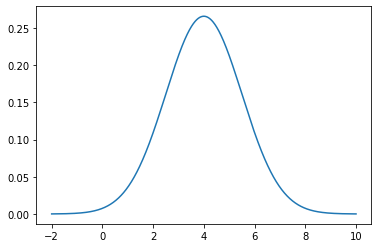

In [20]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-2,10,1000)
mu = 4.0
sigma = 1.5

g = norm.pdf(x,mu,sigma)
plt.plot(x,g)
plt.show()

In [21]:
norm.pdf([2,6],mu,sigma)

array([0.10934005, 0.10934005])

To draw from a continous distribution, we can employ the second approach from the discrete distributions. The corresponding built-in function is the scipy.stats.norm.rvs(mu, sigma, size), e.g.:

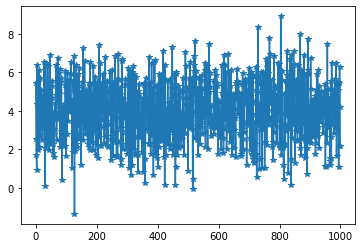

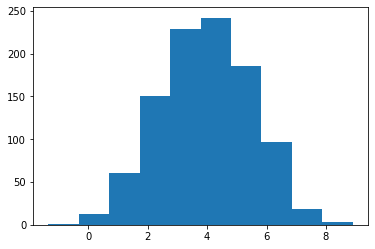

In [22]:
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 4.0
sigma = 1.5

N = 1000

r = norm.rvs(mu,sigma,N)
#print(r)
plt.plot(r,"*-")
plt.show()
plt.hist(r,10)
plt.show()

In [23]:
np.logical_and([True,False],[True,True])

array([ True, False])

In [24]:
sum(r == 4)

0

In [25]:
for i in np.arange(0.5,20):
    s = sum(np.logical_and((r <= i+1), (r>i)))
    print("{:} : {:d}".format(i,s))

0.5 : 35
1.5 : 139
2.5 : 203
3.5 : 238
4.5 : 205
5.5 : 126
6.5 : 38
7.5 : 5
8.5 : 1
9.5 : 0
10.5 : 0
11.5 : 0
12.5 : 0
13.5 : 0
14.5 : 0
15.5 : 0
16.5 : 0
17.5 : 0
18.5 : 0
19.5 : 0


## Gauss Distribution Application: The Galton Machine
A Galton Board (or, _Bean Machine_, or _Quincux_) is a board with pegs nailed in such an arrangement that at each junction an arriving ball can continue either towards left or right, with equal probability:

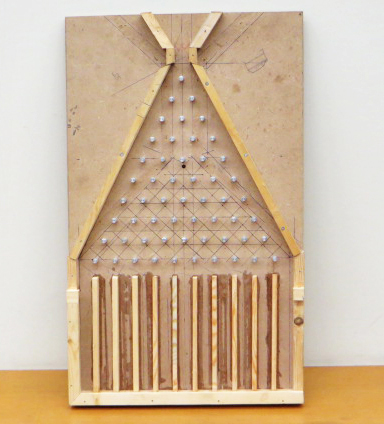
[Source](http://statisticstepbystep.altervista.org/extra-galton-machine/)

Let's work on the probabilities: 
1. The probability that the ball will hit the first peg is definite, i.e., 1.
2. The probability for the left and right pegs getting hit is equal and is 1/2.
3. For our 3rd level, we have 3 pegs: left, right and middle. The left and right pegs (side pegs) can only be hit if the marble continues its sideways motion, hence, carrying from before, its probability is (1/2)(1/2)=(1/4). However, the middle can be hit either from right or from left so, its probability of being hit becomes: 2x(1/2)(1/2) = 1/2.

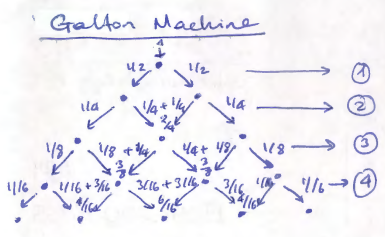

`The possible paths:
                         1
                 L               R
         LL            LR|RL           RR
    LLL     LLR|LRL|RLL     LRR|RLR|RRL   RRR
`

Now we're going to simulate this situation. We will N levels. One can see that each level has number of pegs equal to the level number.

In [26]:
import numpy as np

N = 4 # Number of levels.

ball_position = 0 # Center

path = ""

for n in range(1,N):
    if(np.random.rand()<0.5):
        ball_position -= 1 # Go left:
        path += "L"
    else:
        ball_position += 1 # Go right
        path += "R"

print(ball_position)
print(path)

3
RRR


Now let's repeat this experiment with many balls (M = 10000) and higher number of levels (N = 10):

[   0.   46.    0.  305.    0. 1122.    0. 2165.    0. 2825.    0. 2150.
    0. 1056.    0.  299.    0.   32.]
[  46.  305. 1122. 2165. 2825. 2150. 1056.  299.   32.]


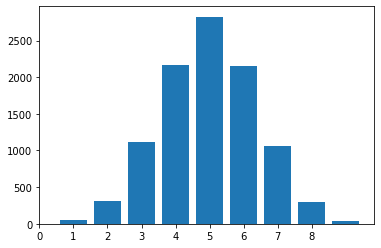

In [27]:
import numpy as np
import matplotlib.pyplot as plt

M = 10000 # Number of balls (/trials)
N = 9 # Number of levels.

storage = np.zeros(N*2)

for m in range(M):
    ball_position = 0 # Center
    for n in range(1,N):
        if(np.random.rand()<0.5):
            ball_position -= 1 # Go left:
        else:
            ball_position += 1 # Go right
    #print(ball_position)
    storage[ball_position+N] += 1

print(storage)
storage_filtered = storage[storage>0]
print(storage_filtered)
plt.bar(np.arange(1,len(storage_filtered)+1),storage_filtered)
plt.xticks(range(len(storage_filtered)))
plt.show()

## Poisson Distribution
When we have a very high number of trials with very low probabilities (like the number of flights & probability of crash, or number of radioactive atoms & probability of decay), the binomial distribution takes the form of:

$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

(here, $\lambda = Np$, with $n$ being the number of trials and $p$ is the probability of the event occuring. As one is very high whereas the other is very low, their product tends to be a reasonable number).

This formula describes the probability of a very-low chance outcome ($p\rightarrow0$) happening k times out of a very high (practically infinite) number of drawings/tries/choosings ($N\rightarrow\infty$) is called as the **Poisson Distribution**.

In [28]:
import scipy as sp
def poisson(l,k):
    return (l**k*np.exp(-l)/sp.special.factorial(k))

### Application: Cesium Decay
<sup>137</sup>Cs is a radioactive element with a half-life of 27 years. Thus the probability that a single Cs atom will decay now is :


In [29]:
years27toseconds = 27*365*24*60*60 # s
p = 1/years27toseconds #s^(-1)
print(p)

1.174436740139429e-09


This is a very small probability. But in 1000 ng, there are around 10<sup>10</sup> Cs atoms. Each one has a chance to decay, therefore we will have:

$$\lambda = Np = (10^{10})(1.174\times10^{-9}s^{-1})=11.74\text{ decays/s}$$

In [30]:
N = 1E10
l = N*p
print("{:g}".format(l))

11.7444


[7.93388761e-06 9.31784910e-05 5.47161216e-04 2.14202078e-03
 6.28916977e-03 1.47724641e-02 2.89155409e-02 4.85135338e-02
 7.12200955e-02 9.29372187e-02 1.09148884e-01 1.16534963e-01
 1.14052452e-01 1.03036454e-01 8.64355693e-02 6.76754055e-02
 4.96753016e-02 3.43179408e-02 2.23912503e-02 1.38405826e-02
 8.12744437e-03 4.54531870e-03 2.42644967e-03 1.23900506e-03
 6.06305444e-04]


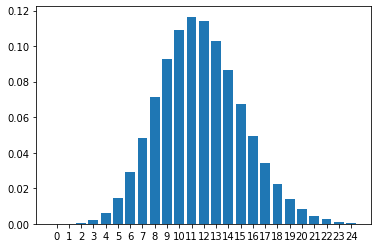

In [31]:
k=np.arange(0,25)
p_k = poisson(l,k)
print(p_k)
plt.bar(k,p_k)
plt.xticks(k)
plt.show()